In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('heart.csv')

In [6]:
data.shape

(918, 12)

In [7]:
sex = pd.get_dummies(data['Sex'],drop_first=True)   #gender is converted into numerical values
chestpaintype = pd.get_dummies(data['ChestPainType'],drop_first=True)
restingecg = pd.get_dummies(data['RestingECG'],drop_first=True)
ExerciseAngina = pd.get_dummies(data['ExerciseAngina'],drop_first=True)
stslope = pd.get_dummies(data['ST_Slope'],drop_first=True)

In [8]:
data.drop(['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'],axis=1,inplace=True)  

In [9]:
data = pd.concat([data,sex,chestpaintype,restingecg,ExerciseAngina,stslope],axis=1)

In [10]:
column_names = ['Age','M','ATA','NAP','TA','RestingBP','Cholesterol','FastingBS','Normal','ST','MaxHR','Y','Oldpeak','Flat','Up','HeartDisease']
data = data.reindex(columns=column_names)

In [11]:
X = data.drop(['HeartDisease'], axis = 1) #define the features as X 

In [12]:
y = data['HeartDisease'] #define the label as Y

In [13]:
from sklearn.model_selection import train_test_split  #import the data selection libr

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 

<AxesSubplot:xlabel='RestingBP', ylabel='Cholesterol'>

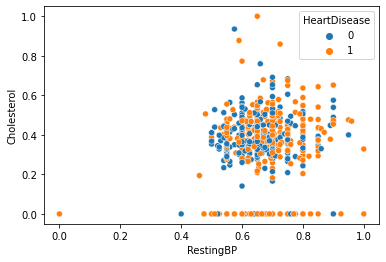

In [15]:
#Normalization
min_train = X_train.min() #get the minimum values of training features
range_train = (X_train-min_train).max()  #get range of the data features
X_train_scaled = (X_train-min_train)/range_train #normalizing the features
sns.scatterplot( x = X_train_scaled['RestingBP'], y =X_train_scaled ['Cholesterol'],hue = 'HeartDisease', data = data) #viasualize the particular faetures after

In [16]:
min_test = X_test.min()     #normalizing the testing features
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [57]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss = 'log',max_iter=1000, tol=0.01)

In [58]:
clf.fit(X_train_scaled, y_train)

SGDClassifier(loss='log', tol=0.01)

In [59]:
predictions = clf.predict(X_test_scaled) #test the model performance 

In [60]:
from sklearn.metrics import classification_report,confusion_matrix #import the performanc

In [61]:
print(classification_report(y_test,predictions))  #print the performance of the algo

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        73
           1       0.95      0.88      0.92       111

    accuracy                           0.90       184
   macro avg       0.90      0.91      0.90       184
weighted avg       0.91      0.90      0.90       184



In [62]:
cm = confusion_matrix(y_test,predictions)  #define the confusion matrix as cm

Text(123.0, 0.5, 'True Class')

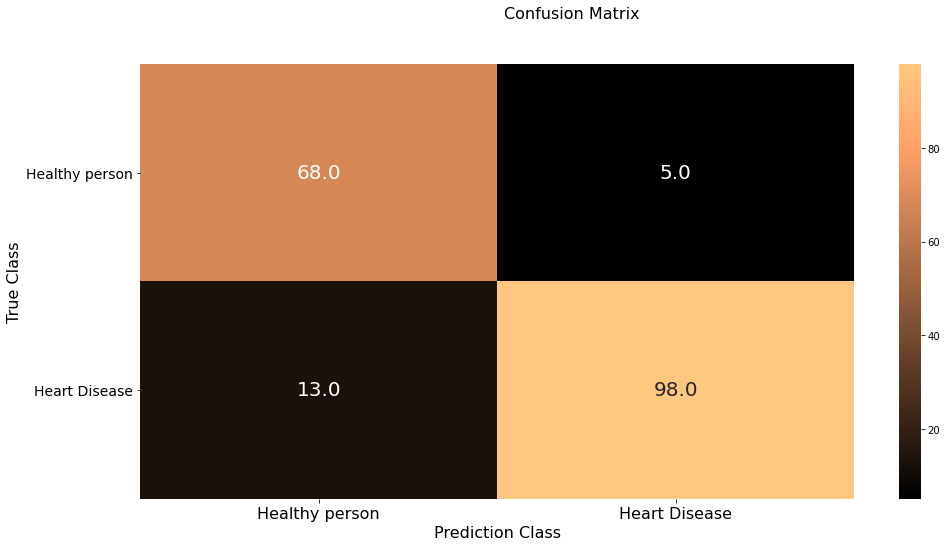

In [63]:
fig=plt.figure(figsize=(16,8))
xticklabel=['Healthy person','Heart Disease']
plt.xticks(fontsize=16)

cm = confusion_matrix(y_test,predictions) #define the confusion matrix as cm
sns.heatmap(cm, annot=True,fmt=".1f",xticklabels =xticklabel, yticklabels=xticklabel,cmap="copper",annot_kws={"size": 20})
plt.yticks(fontsize=14,rotation=0)  #visualize the confusion matrix
fig.suptitle('Confusion Matrix', fontsize=16)
plt.xlabel("Prediction Class",fontsize=16)
plt.ylabel("True Class",fontsize=16)

In [64]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Log_ROC_auc = roc_auc_score(y_test,clf.predict(X_test_scaled))
fpr,tpr,thresholds = roc_curve(y_test,clf.predict_proba(X_test_scaled)[:,1])

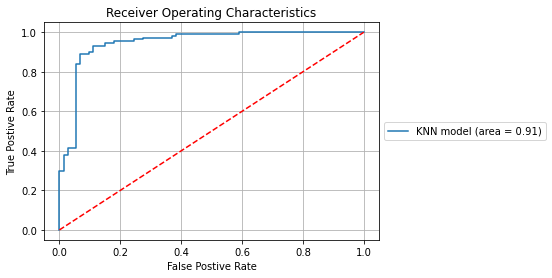

In [65]:
plt.figure()
plt.plot(fpr,tpr,label='KNN model (area = %0.2f)' % Log_ROC_auc)
plt.plot((0,1),(0,1),'r--')
plt.xlabel('False Postive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristics')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()